In [1]:
import numpy as np
import seaborn as sns

In [2]:
%store -r train_x

In [3]:
%store -r y

In [4]:
data_x = train_x.copy()

In [5]:
data_x.head()

,Pclass,Fare,sex_encoded,cabin_letter,cabin_number,title_encoded
0,3,7.2500,0,13,0,2
1,1,71.2833,1,2,85,3
2,3,7.9250,1,13,0,3
3,1,53.1000,1,2,123,3
4,3,8.0500,0,13,0,2


# Evaluate model with cross-validation

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

skf = StratifiedKFold(n_splits=10, random_state=31)

In [7]:
data_x = np.array(data_x)
y = np.array(y)

In [8]:
evals = []
random_seed_state = 31

for train_index, test_index in skf.split(data_x, y):
    train_x, train_y = data_x[train_index], y[train_index]
    test_x, test_y = data_x[test_index], y[test_index]
    
    rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=random_seed_state)
    
    fit_result = rfc.fit(train_x, train_y)
    
    predict_y = rfc.predict(test_x)
    
    evals.append(f1_score(test_y, predict_y, average='macro'))
    
print(evals)

[0.7896103896103897, 0.8023000387646984, 0.7525027808676308, 0.8367400419287211, 0.9010011123470523, 0.8242727392391733, 0.8020022246941045, 0.7954022988505747, 0.8008424378043965, 0.8322440087145969]


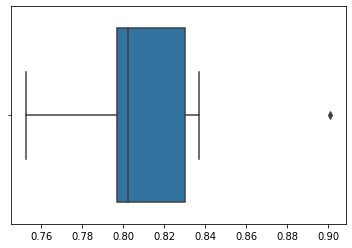

In [10]:
sns.boxplot(evals)

# Search for best hyper-parameters

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
n_estimators = [1600, 2000, 2400]
max_depth = [8, 12, 16]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 5, 10]

param_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'n_estimators':n_estimators
}

In [13]:
hp_rcf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=random_seed_state)
gscv = GridSearchCV(estimator=hp_rcf, param_grid=param_grid, n_jobs=-1, cv=5, verbose=3)

gscv.fit(data_x, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  7.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=-1,
                                              oob_score=False, random_state=31,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_de

In [14]:
optimalEstimator = gscv.best_estimator_

optimalEstimator.fit(data_x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=-1, oob_score=False, random_state=31, verbose=0,
                       warm_start=False)

In [15]:
optimalEstimator.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1600,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 31,
 'verbose': 0,
 'warm_start': False}

In [19]:
optimalEstimator.predict([
    [0, 22, 0, 0, 0, 1]
])

array([1])

In [21]:
import joblib

joblib.dump(optimalEstimator, 'model.joblib')

['model.joblib']